### Importación de datos



In [88]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

df = pd.concat([tienda, tienda2, tienda3, tienda4])
df['Ingresos Netos'] = df['Precio'] - df['Costo de envío']

df.head()
#tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Ingresos Netos
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,183900.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,193700.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,716500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,315000.0


#1. Análisis de facturación



In [89]:
tienda_1_Ingresos_Netos = tienda['Precio'].sum() - tienda['Costo de envío'].sum()
tienda_2_Ingresos_Netos = tienda2['Precio'].sum() - tienda2['Costo de envío'].sum()
tienda_3_Ingresos_Netos = tienda3['Precio'].sum() - tienda3['Costo de envío'].sum()
tienda_4_Ingresos_Netos = tienda4['Precio'].sum() - tienda4['Costo de envío'].sum()

print(f'Total ingresos de la tienda 1: {tienda_1_Ingresos_Netos}')
print(f'Total ingresos de la tienda 2: {tienda_2_Ingresos_Netos}')
print(f'Total ingresos de la tienda 3: {tienda_3_Ingresos_Netos}')
print(f'Total ingresos de la tienda 4: {tienda_4_Ingresos_Netos}')

Total ingresos de la tienda 1: 1089502500.0
Total ingresos de la tienda 2: 1056858400.0
Total ingresos de la tienda 3: 1039503000.0
Total ingresos de la tienda 4: 983058300.0


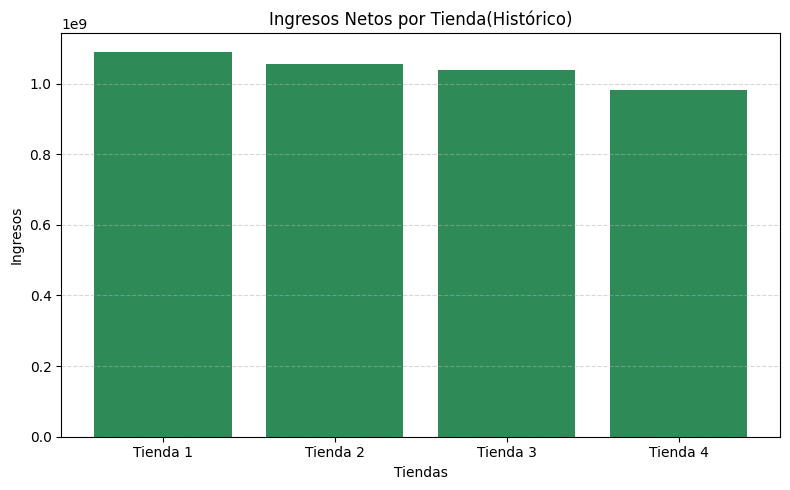

In [90]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [tienda_1_Ingresos_Netos, tienda_2_Ingresos_Netos, tienda_3_Ingresos_Netos, tienda_4_Ingresos_Netos]

plt.figure(figsize=(8,5))
plt.bar(tiendas, ingresos, color='seagreen')
plt.title('Ingresos Netos por Tienda(Histórico)')
plt.ylabel('Ingresos')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [104]:
def ventas_tienda_por_año(tienda):
  #creación de nuevas columnas
  tienda['Ingresos Netos'] = tienda['Precio'] - tienda['Costo de envío']
  #tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], errors='coerce')
  tienda['Año'] = tienda['Fecha de Compra'].dt.year

  # Agrupar ingresos por año
  ingresos_por_año_tienda = tienda.groupby('Año')['Ingresos Netos'].sum()
  ingresos_por_año_tienda.index = ingresos_por_año_tienda.index.astype(int)
  print(ingresos_por_año_tienda)

  # Graficar ingresos por año
  año = tienda['Año'].unique()
  ingresos = ingresos_por_año_tienda.values
  años = ingresos_por_año_tienda.index.astype(str)
  
  plt.figure(figsize=(8,5))
  plt.bar(años, ingresos)
  plt.title('Ingresos Totales Tienda 1 por Año')
  plt.ylabel('Ingresos')
  plt.xlabel('Año')
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.tight_layout()
  plt.show()




Ingesos totales por año de la tienda 1


Año
2020    349187000.0
2021    342901100.0
2022    299703300.0
2023     97711100.0
Name: Ingresos Netos, dtype: float64


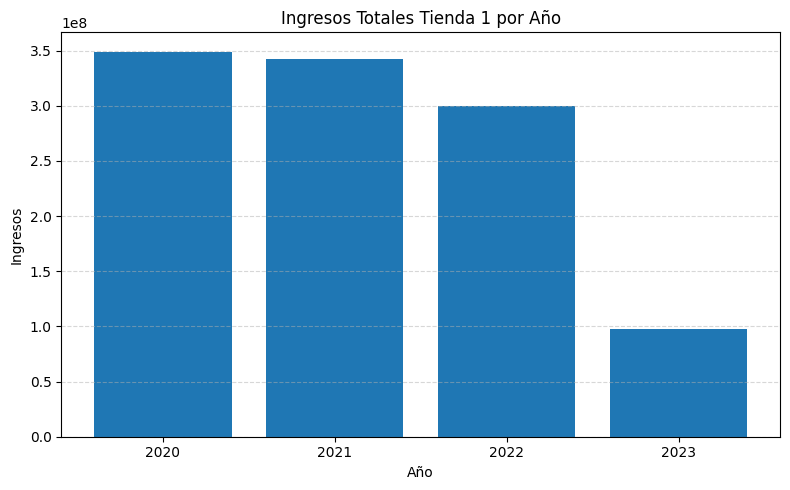



Ingesos totales por año de la tienda 2


Año
2020    124388300.0
2021    109111000.0
2022    136106800.0
2023     37524100.0
Name: Ingresos Netos, dtype: float64


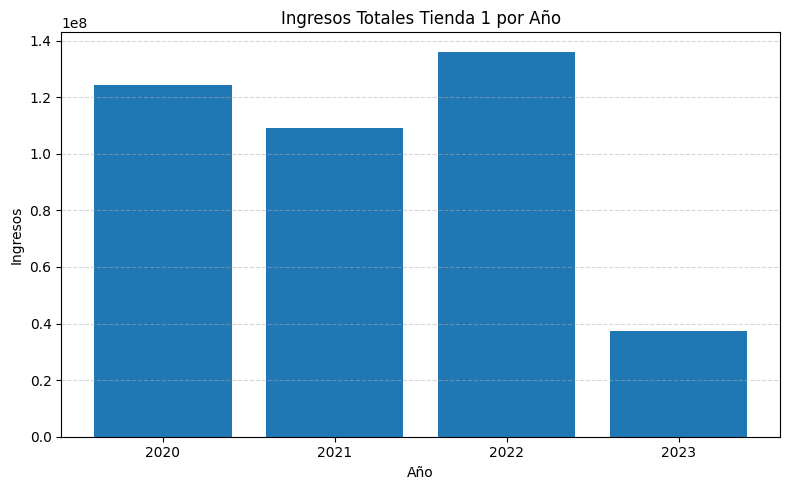



Ingesos totales por año de la tienda 3


Año
2020    304639600.0
2021    343569600.0
2022    331710000.0
2023     59583800.0
Name: Ingresos Netos, dtype: float64


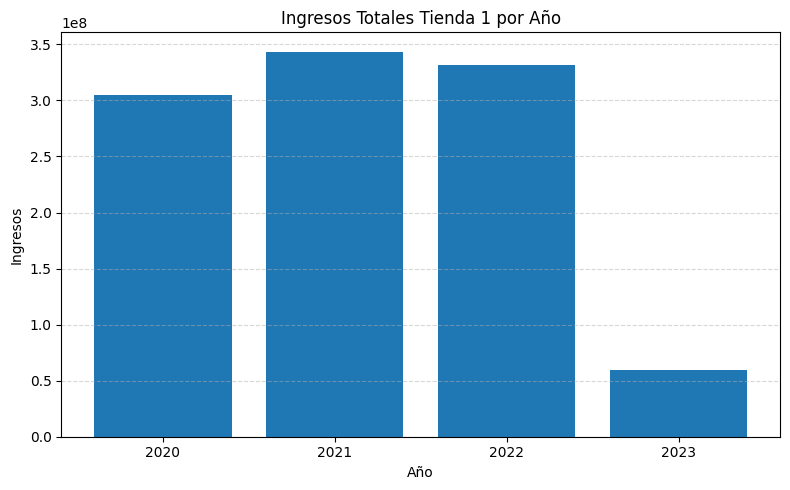



Ingesos totales por año de la tienda 4


Año
2020    106481600.0
2021    114249100.0
2022    104859600.0
2023     23448300.0
Name: Ingresos Netos, dtype: float64


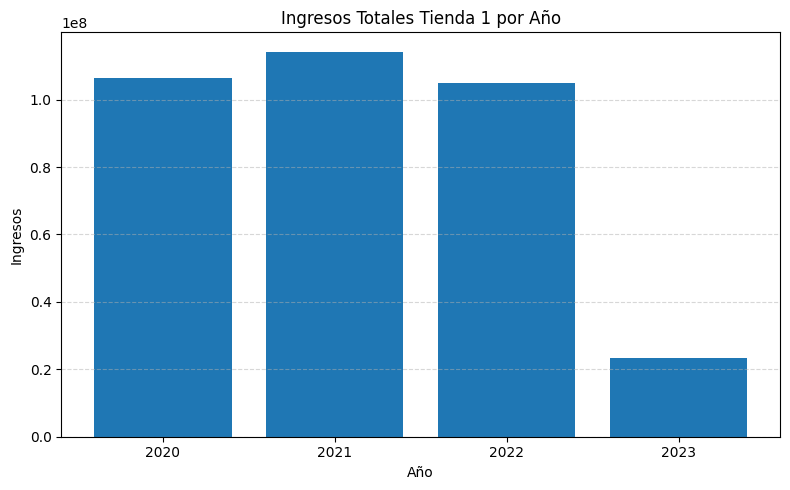

In [105]:
print("\n\nIngesos totales por año de la tienda 1\n\n")
ventas_tienda_por_año(tienda)
print("\n\nIngesos totales por año de la tienda 2\n\n")
ventas_tienda_por_año(tienda2)
print("\n\nIngesos totales por año de la tienda 3\n\n")
ventas_tienda_por_año(tienda3)
print("\n\nIngesos totales por año de la tienda 4\n\n")
ventas_tienda_por_año(tienda4)

# 2. Ventas por categoría

In [115]:
import seaborn as sns

def ventas_categorias(df):
  
  #colors = sns.color_palette("husl", len(ventas_tienda))
  ventas_tienda= df.groupby('Categoría del Producto')['Ingresos Netos'].sum()
  ventas_tienda = ventas_tienda.sort_values(ascending=False)

  print(ventas_tienda)

  # Gráfico

  plt.figure(figsize=(10, 7))
  #plt.bar(ventas_tienda.index, ventas_tienda.values, color=colors)
  plt.bar(ventas_tienda.index, ventas_tienda.values, color="brown")
  plt.title('Ventas históricas por categoría')
  plt.ylabel('Ingresos')
  plt.xlabel('Categoría')
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.tight_layout()
  for i, valor in enumerate(ventas_tienda.values):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)

  plt.show()



Ventas históricas por categoría de la cadena 1


Categoría del Producto
Electrónicos               1.572114e+09
Electrodomésticos          1.254355e+09
Muebles                    7.172106e+08
Instrumentos musicales     3.302683e+08
Deportes y diversión       1.352861e+08
Juguetes                   6.958310e+07
Artículos para el hogar    5.446870e+07
Libros                     3.563620e+07
Name: Ingresos Netos, dtype: float64


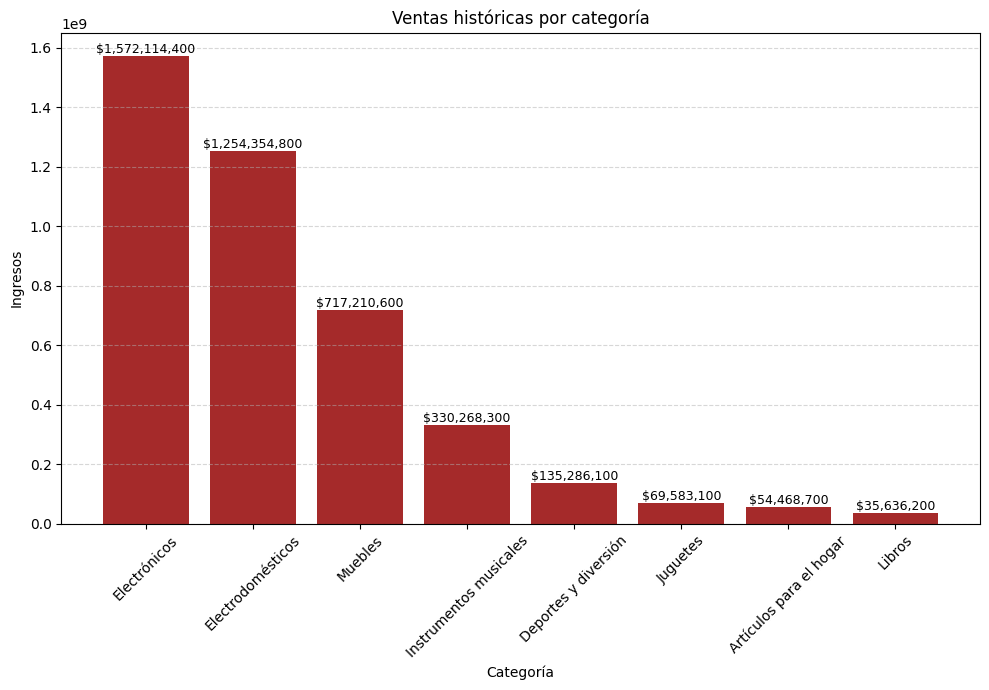

In [116]:

print("\n\nVentas históricas por categoría de la cadena 1\n\n")
ventas_categorias(df)



Tienda 1


Categoría del Producto
Electrónicos               406529800.0
Electrodomésticos          344361200.0
Muebles                    177638800.0
Instrumentos musicales      86415100.0
Deportes y diversión        37168900.0
Juguetes                    17016200.0
Artículos para el hogar     12054600.0
Libros                       8317900.0
Name: Ingresos Netos, dtype: float64


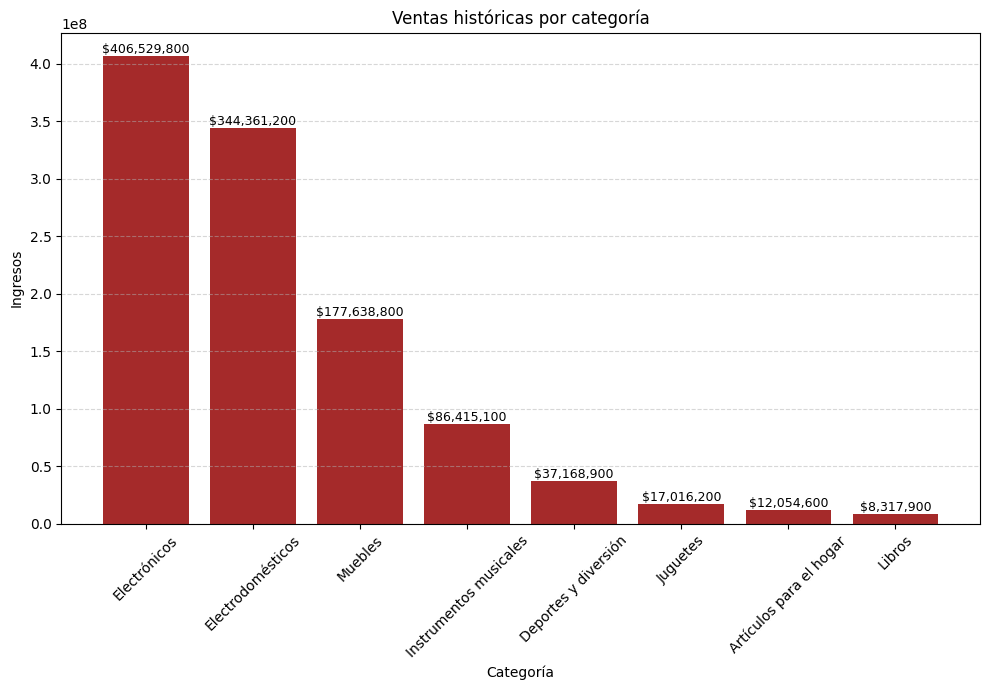



Tienda 2


Categoría del Producto
Electrónicos               389016900.0
Electrodomésticos          330012200.0
Muebles                    166990200.0
Instrumentos musicales      99432600.0
Deportes y diversión        32867200.0
Juguetes                    15057800.0
Artículos para el hogar     13946100.0
Libros                       9535400.0
Name: Ingresos Netos, dtype: float64


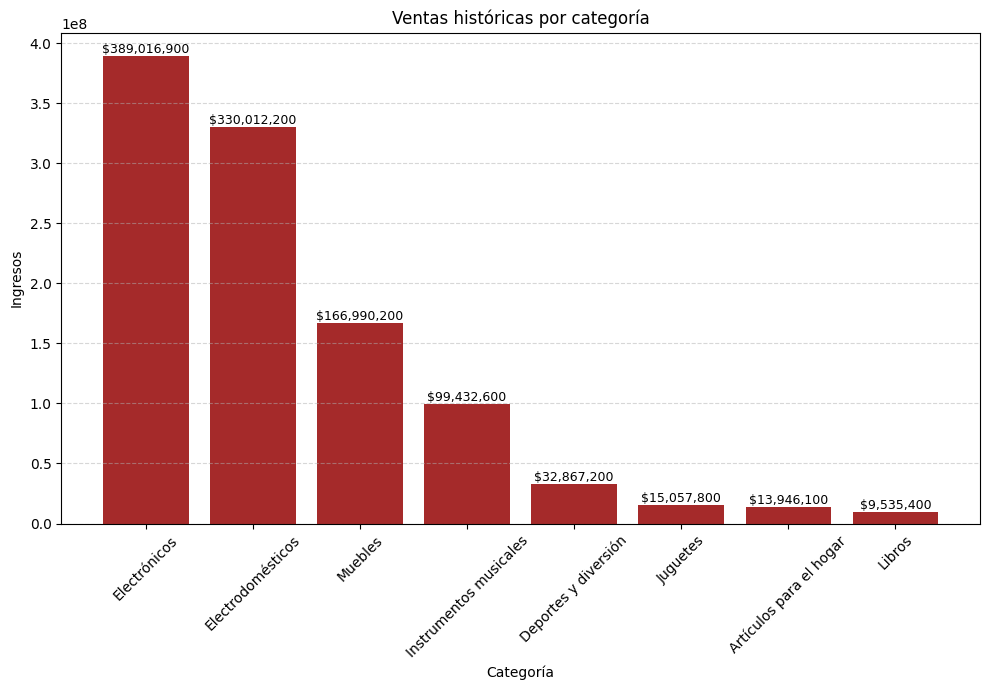



Tienda 3


Categoría del Producto
Electrónicos               388919900.0
Electrodomésticos          311743700.0
Muebles                    190288000.0
Instrumentos musicales      73272100.0
Deportes y diversión        33670000.0
Juguetes                    18359400.0
Artículos para el hogar     14247600.0
Libros                       9002300.0
Name: Ingresos Netos, dtype: float64


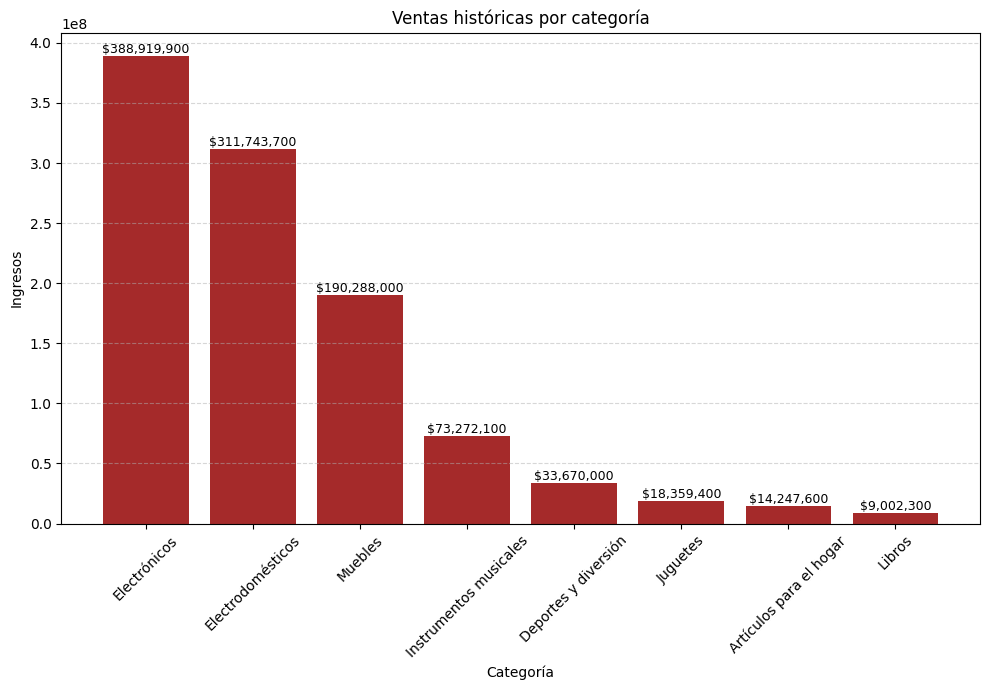



Tienda 4


Categoría del Producto
Electrónicos               387647800.0
Electrodomésticos          268237700.0
Muebles                    182293600.0
Instrumentos musicales      71148500.0
Deportes y diversión        31580000.0
Juguetes                    19149700.0
Artículos para el hogar     14220400.0
Libros                       8780600.0
Name: Ingresos Netos, dtype: float64


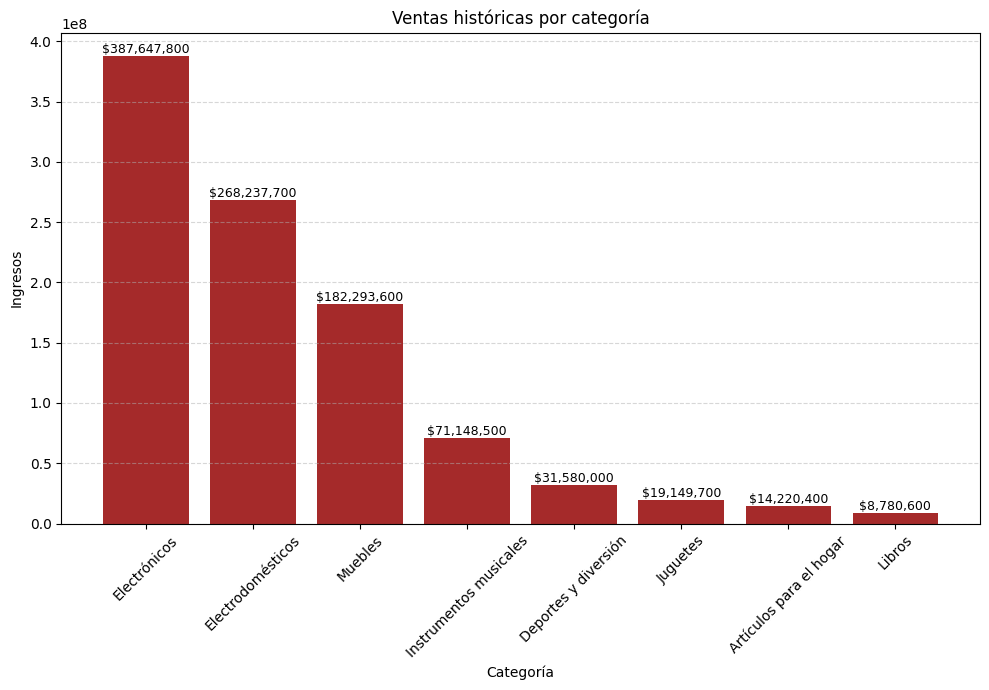

In [117]:
#Ventas históricas por categoría y tienda.

print("\n\nTienda 1\n\n")
ventas_categorias(tienda)
print("\n\nTienda 2\n\n")
ventas_categorias(tienda2)
print("\n\nTienda 3\n\n")
ventas_categorias(tienda3)
print("\n\nTienda 4\n\n")
ventas_categorias(tienda4)

# 3. Calificación promedio de la tienda


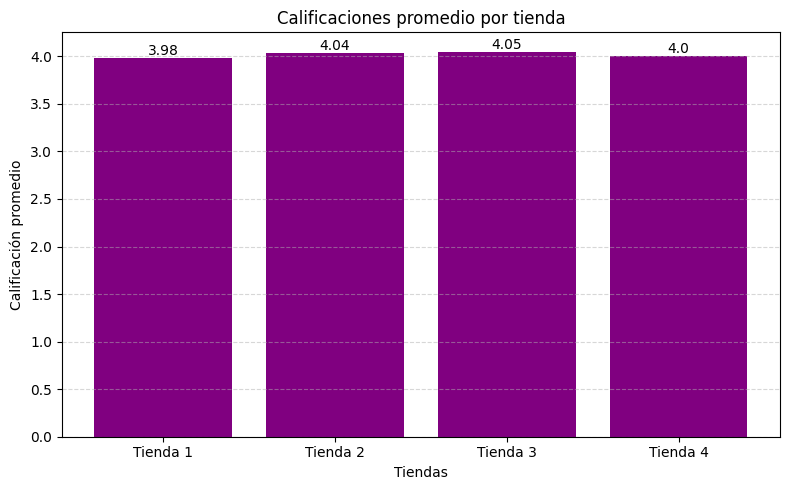

In [ ]:
def calcular_promedio_calificacion(tienda):
    promedio = tienda["Calificación"].mean()
    return round(promedio, 2)


def graficar_calificaciones(calificaciones):
    plt.figure(figsize=(8,5))
    plt.bar(calificaciones.keys(), calificaciones.values(), color='purple')
    plt.title('Calificaciones promedio por tienda')
    plt.ylabel('Calificación promedio')
    plt.xlabel('Tiendas')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    for key, value in calificaciones.items():
        plt.text(key, value, str(value), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

calificaciones = {
    "Tienda 1": calcular_promedio_calificacion(tienda),
    "Tienda 2": calcular_promedio_calificacion(tienda2),
    "Tienda 3": calcular_promedio_calificacion(tienda3),
    "Tienda 4": calcular_promedio_calificacion(tienda4)
}


graficar_calificaciones(calificaciones)

In [176]:
def promedio_calificacion_año(df):
  # Agrupar calificaciones por año
  promedio_calificacion = df.groupby('Año')['Calificación'].mean().round(2)
  return promedio_calificacion
def graficar_promedio_anual(df):

  plt.figure(figsize=(8,5))
  plt.bar(df.index.astype(str), df.values, color='orange')
  plt.title('Calificación promedio por año')
  plt.ylabel('Calificación promedio')
  plt.xlabel('Año')
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  for i, valor in enumerate(df.values):
      plt.text(i, valor, str(valor), ha='center', va='bottom')
  plt.tight_layout()
  plt.show()





 Promedio de calificaciones por año Tienda 1




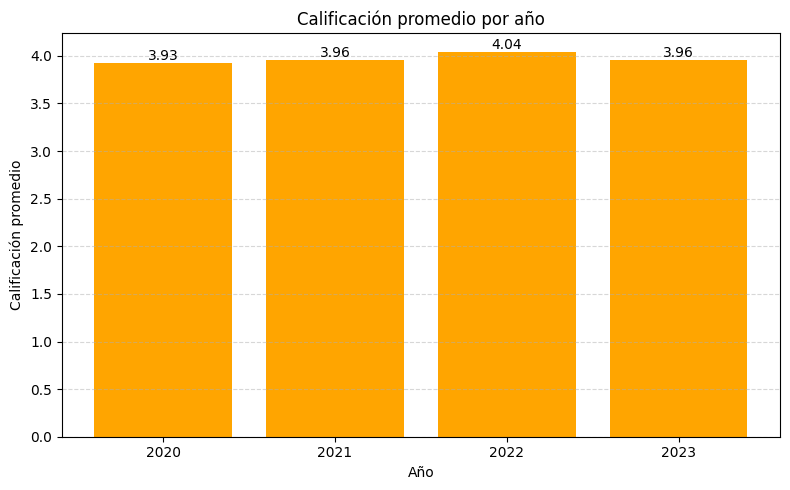



 Promedio de calificaciones por año Tienda 2




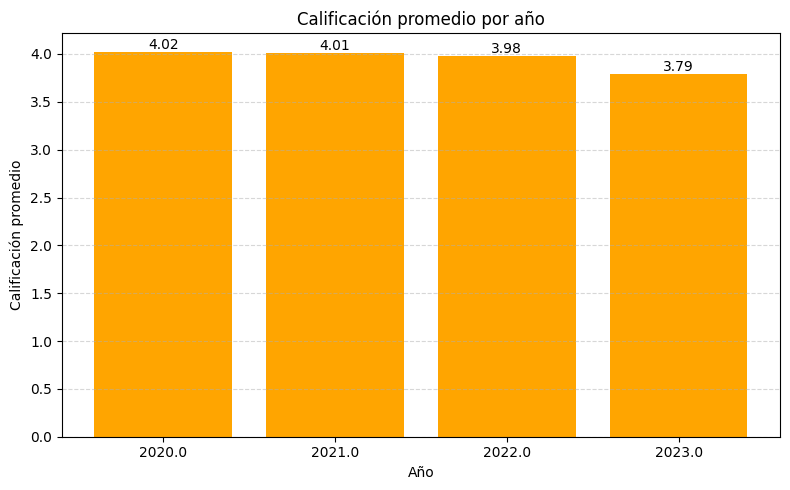



 Promedio de calificaciones por año Tienda 3




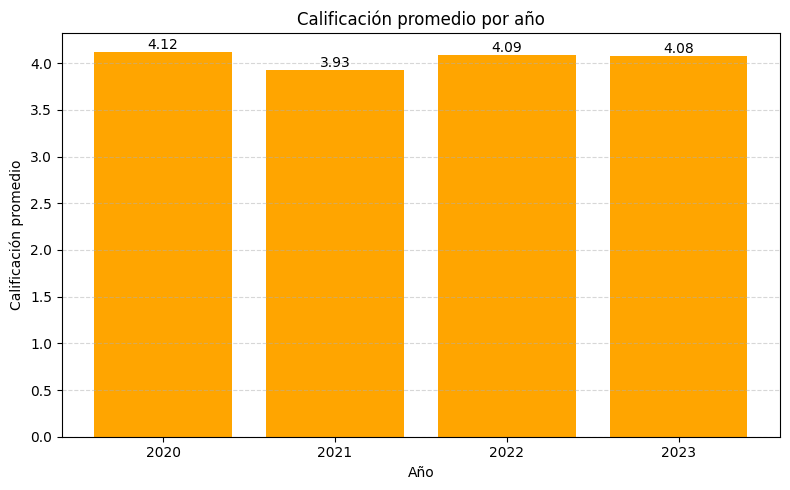



 Promedio de calificaciones por año Tienda 4




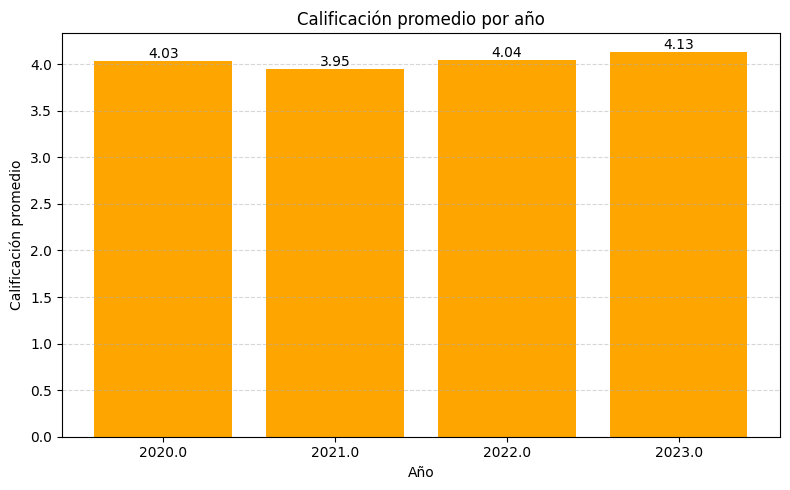

In [177]:
print("\n\n Promedio de calificaciones por año Tienda 1\n\n")
graficar_promedio_anual(promedio_calificacion_año(tienda))
print("\n\n Promedio de calificaciones por año Tienda 2\n\n")
graficar_promedio_anual(promedio_calificacion_año(tienda2))
print("\n\n Promedio de calificaciones por año Tienda 3\n\n")
graficar_promedio_anual(promedio_calificacion_año(tienda3))
print("\n\n Promedio de calificaciones por año Tienda 4\n\n")
graficar_promedio_anual(promedio_calificacion_año(tienda4))


# 4. Productos más y menos vendidos

In [178]:
tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Ingresos Netos,Año
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,157400.0,2021
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,183900.0,2022
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,193700.0,2021
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,716500.0,2022
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,315000.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,2021-11-15,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359,1217800.0,2021
2355,Impresora,Electrónicos,282800.0,15300.0,2023-03-18,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175,267500.0,2023
2356,Juego de mesa,Juguetes,122900.0,7200.0,2021-07-06,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250,115700.0,2021
2357,Cama box,Muebles,691300.0,35000.0,2022-05-02,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111,656300.0,2022


# 5. Envío promedio por tienda